In [2]:
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
from scipy import stats
import statsmodels.api as sm
import numpy as np

In [3]:
file_path = 'Original_data_with_more_rows.csv'
data = pd.read_csv(file_path,nrows=500)
data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
495,495,male,group D,high school,standard,completed,68,64,66
496,496,female,group C,some college,standard,none,54,48,52
497,497,female,group D,some college,free/reduced,completed,59,78,76
498,498,female,group B,some high school,standard,none,66,69,68


In [4]:
size = os.path.getsize(file_path)
size_mb = size/(1024 ** 2)
print(f'Kích thước bộ dữ liệu đầu vào: {size_mb:.2f} MB')

Kích thước bộ dữ liệu đầu vào: 1.74 MB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    500 non-null    int64 
 1   Gender        500 non-null    object
 2   EthnicGroup   500 non-null    object
 3   ParentEduc    500 non-null    object
 4   LunchType     500 non-null    object
 5   TestPrep      500 non-null    object
 6   MathScore     500 non-null    int64 
 7   ReadingScore  500 non-null    int64 
 8   WritingScore  500 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 35.3+ KB


### Thông tin trường dữ liệu

- Gender: Giới tính của học sinh (female - nữ, male - nam).
- Race/Ethnicity: Nhóm chủng tộc/ dân tộc mà học sinh thuộc về, được phân thành các nhóm từ A đến C (ví dụ: group B, group C).
- Parental Level of Education: Trình độ học vấn của phụ huynh, có thể là: bachelor's degree (cử nhân), some college (đang học đại học), master’s degree (thạc sĩ), associate’s degree (cao đẳng).
- Lunch: Loại bữa trưa mà học sinh được nhận, phân thành hai loại: standard (tiêu chuẩn) và free/reduced (miễn phí/giảm giá).
- Test Preparation Course: Tình trạng tham gia khóa học chuẩn bị kiểm tra của học sinh, có thể là: completed (đã hoàn thành) hoặc none (không tham gia).
- Math Score: Điểm số môn Toán.
- Reading Score: Điểm số môn Đọc hiểu.
- Writing Score: Điểm số môn Viết.

In [6]:
#df = data[~((data['Gender'] == 'female') & (data['MathScore'].isin([0])))]
fig = px.box(data, x='Gender', y='MathScore', title='Interactive Boxplot')
fig.show()

### Đánh giá tính chuẩn của phân phối điểm môn Toán cho các học sinh

In [7]:
Math_Male = data['MathScore'][data['Gender'] == 'male']
Math_Female = data['MathScore'][data['Gender'] == 'female']

# Hiển thị kết quả shapiro test
shapiro_test1 = stats.shapiro(Math_Male)
print(f'Math_Male: {shapiro_test1}')

shapiro_test2 = stats.shapiro(Math_Female)
print(f'Math_Female: {shapiro_test2}')

Math_Male: ShapiroResult(statistic=0.9899704009481813, pvalue=0.07699299602870834)
Math_Female: ShapiroResult(statistic=0.984551019796299, pvalue=0.009083447844351047)


Kết luận:
- 0.076 > 0.05 --> Điều này cho thấy không có bằng chứng để bác bỏ giả thuyết không với mức ý nghĩa 0.05, tức là điểm Toán của học sinh nam có thể được coi là tuân theo phân phối chuẩn.
- 0.009 < 0.05> --> Điều này cho thấy có bằng chứng để bác bỏ giả thuyết không với mức ý nghĩa 0.05, tức là điểm Toán của học sinh nữ không tuân theo phân phối chuẩn.

shapiro-wilk
- giá trị thống kê đo lường mức độ tương đồng giữa phân phối của mẫu dữ liệu với phân phối chuẩn
- giá trị thống kê càng gần 1 thì mẫu dữ liệu càng có xu hướng phân phối chuẩn
- p-value dùng để xác định xem có thể bác bỏ giải thuyết không (ở mức ý nghĩa 0.05), trong phân phối này H0 : "mẫu dữ liệu có là phân phối chuẩn"
- p-value > 0.05 --> ko có đủ bằng chứng để bác bỏ
- p-value < 0.05 --> bác bỏ giả thuyết

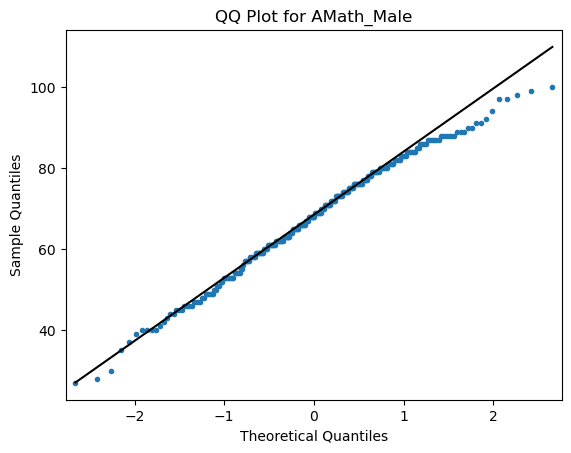

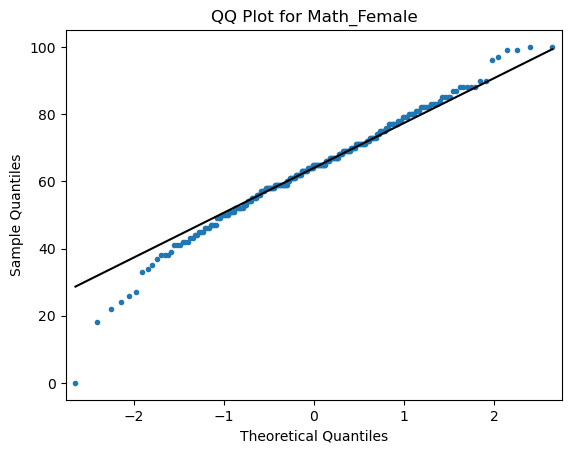

In [8]:
# Tạo QQ plot cho dữ liệu Math_Male
fig1 = sm.qqplot(Math_Male, line='q')
plt.setp(fig1.gca().lines, markersize=3, color='black')
plt.title('QQ Plot for AMath_Male')
plt.show()

# Tạo QQ plot cho dữ liệu Math_Female
fig2 = sm.qqplot(Math_Female, line='q')
plt.setp(fig2.gca().lines, markersize=3, color='black')
plt.title('QQ Plot for Math_Female')
plt.show()

biểu đồ Q-Q:
- dữ liệu có phù hợp với phân phối chuẩn hay không, thông qua việc so sánh phần trăm của dữ liệu với các phần trăm tương ứng của phân phối chuẩn
- Nếu các điểm tập trung gần 1 đường thẳng thì cho thấy dữ liệu có thể phân bố tương tự như phân phối chuẩn.

In [9]:
df = data[~((data['Gender'] == 'female') & (data['MathScore'].isin([0])))]
Math_Male = df['MathScore'][df['Gender'] == 'male']
Math_Female = df['MathScore'][df['Gender'] == 'female']

# Hiển thị kết quả shapiro test
shapiro_test1 = stats.shapiro(Math_Male)
print(f'Math_Male: {shapiro_test1}')

shapiro_test2 = stats.shapiro(Math_Female)
print(f'Math_Female: {shapiro_test2}')

Math_Male: ShapiroResult(statistic=0.9899704009481813, pvalue=0.07699299602870834)
Math_Female: ShapiroResult(statistic=0.9928480321034965, pvalue=0.286603837082199)


# So sánh phương sai của hai nhóm

In [10]:
# Tính toán phương sai của hai nhóm
var_math_male = Math_Male.var(ddof=1)
var_math_female = Math_Female.var(ddof=1)

# Tính giá trị F (tỉ số phương sai)
F = var_math_male / var_math_female
# xét xem 2 phương sai có bằng nhau không

# Tính bậc tự do (degrees of freedom) cho hai nhóm
df_num = len(Math_Male) - 1
df_denom = len(Math_Female) - 1

# Tính p-value sử dụng phân phối F
p_value = stats.f.cdf(F, df_num, df_denom)

# Kiểm tra giá trị p-value
if p_value > 0.5: # điều chỉnh p-value cho kiểm định hai phía
    p_value = 1 - p_value

# Nhân đôi p-value vì đây là kiểm định hai phía
p_value = 2 * p_value

# Tính khoảng tin cậy 95% cho tỉ số phương sai
ci_lower = F / stats.f.ppf(0.975, df_num, df_denom)
ci_upper = F / stats.f.ppf(0.025, df_num, df_denom)

# Hiển thị kết quả
print('PHƯƠNG SAI :')
print(f"Giá trị thống kê F: {F}")
print(f"Bậc tự do của nhóm nam (tử số): {df_num}")
print(f"Bậc tự do của nhóm nữ (mẫu số): {df_denom}")
print(f"p-value: {p_value}")
print(f"Khoảng tin cậy 95% cho tỷ số phương sai: ({ci_lower}, {ci_upper})")

PHƯƠNG SAI :
Giá trị thống kê F: 0.9751408066335685
Bậc tự do của nhóm nam (tử số): 253
Bậc tự do của nhóm nữ (mẫu số): 244
p-value: 0.8422924045087086
Khoảng tin cậy 95% cho tỷ số phương sai: (0.7597725822897381, 1.250844997332776)


- Thống kê F test để kiểm tra xem hai nhóm có phương sai bằng nhau không
- kết quả p-value > 0.05 --> không có đủ bằng chứng để bác bỏ giả thuyết --> tức là phương sai của điểm số Toán giữa hai nhóm nam và nữ có thể được xem là bằng nhau.

In [11]:
# Thực hiện kiểm định H0 với giả định ma trận hiệp phương sai bằng nhau
# Tính trung bình của hai nhóm
mean_male = Math_Male.mean()
mean_female = Math_Female.mean()
mean_diff = mean_female - mean_male
# Kích thước mẫu của hai nhóm
n1 = len(Math_Male)
n2 = len(Math_Female)

# Phương sai tổng hợp
pooled_var = ((n1 - 1) * np.var(Math_Male, ddof=1) + (n2 - 1) * np.var(Math_Female, ddof=1)) / (n1 + n2 - 2)

# Giá trị c^2 từ phân phối F
p = 1 # Dữ liệu 1 chiều
f_critical = stats.f.ppf(1 - 0.05, p, n1 + n2 - p - 1)
c_squared = ((n1 + n2 - 2) * p / (n1 + n2 - p - 1)) * f_critical

# Tìm khoảng tin cậy 95%
x = np.sqrt((1/n1 + 1/n2)*pooled_var)
confidence_interval = [mean_diff - np.sqrt(c_squared)*x, mean_diff + np.sqrt(c_squared)*x]

# Hiển thị kết quả
print('TRUNG BÌNH :')
print(f"Trung bình của nhóm Nam: {mean_male}")
print(f"Trung bình của nhóm Nữ: {mean_female}")
print(f"Khoảng tin cậy cho sự khác biệt trung bình: {confidence_interval}")

TRUNG BÌNH :
Trung bình của nhóm Nam: 67.66141732283465
Trung bình của nhóm Nữ: 63.96326530612245
Khoảng tin cậy cho sự khác biệt trung bình: [-6.277805994346487, -1.1184980390779136]
